# SVM 代码实践

直接借助于 python 机器学习工具包 sklearn 来演示 SVM 的应用，sklearn中对 SVM 的算法实现都包在 sklearn.svm 下面，具体见 sklearn 官方文档，其中 SVC 类是用来进行进行分类的任务，SVR 是用来进行数值回归任务的。

不同的核函数需要指定不同的参数。

- 针对线性函数，只需要指定参数 $C$ ，它表示对不符合最大间距规则的样本的惩罚力度。
- 针对多项式核函数，除了参数 $C$ 外，还需要指定 `degree`，它表示多项式的阶数。
- 针对高斯核函数，除了参数 $C$ 外，还需要指定 `gamma` 值，这个值对应的是高斯函数公式中 $\frac{1}{2 \sigma^{2}}$ 的值。

## 1 鸢尾花二分类数据集

### 1.1 使用线性核函数

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [5]:
def show_result(X, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)

In [6]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # 只取前两维特征，方便可视化
y = iris.target

In [7]:
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

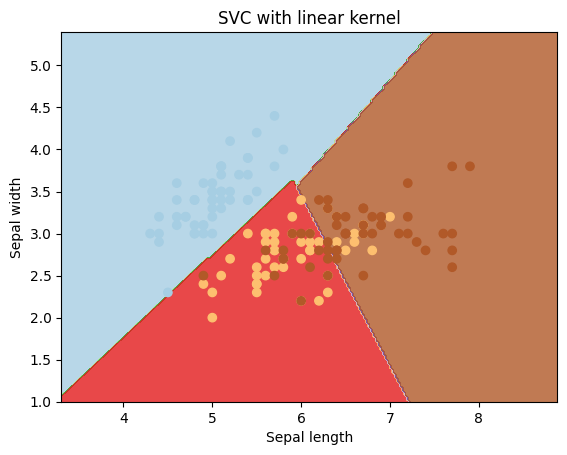

In [8]:
show_result(X, model=svc, title="SVC with linear kernel")

### 1.2 使用多项式核函数

初始化 SVM 对象的代码替换为下面这行。

In [9]:
svc = svm.SVC(kernel='poly', degree=3).fit(X, y)

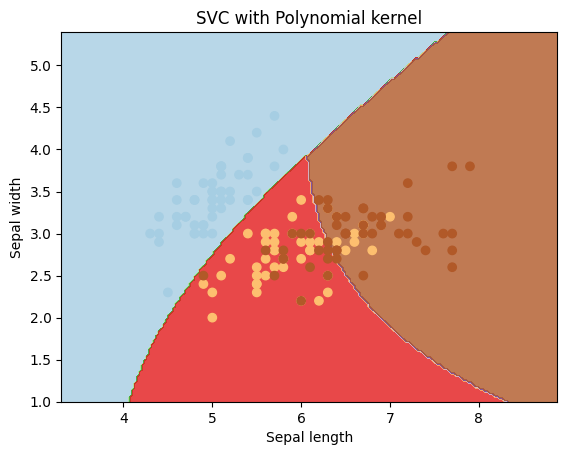

In [10]:
show_result(X, model=svc, title="SVC with Polynomial kernel")

### 1.3 使用 rbf 核函数（高斯核函数）

初始化 SVM 对象的代码替换为下面这行。

In [11]:
svc = svm.SVC(kernel='rbf', C=1).fit(X, y)

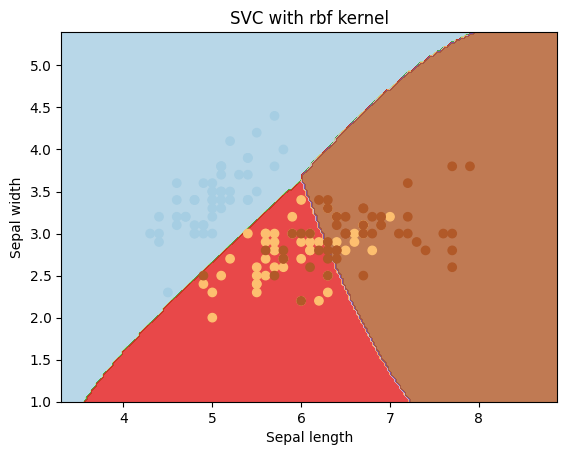

In [12]:
show_result(X, model=svc, title="SVC with rbf kernel")

---

## 2 乳腺癌预测

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
breast_cancer = datasets.load_breast_cancer()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

- 朴素贝叶斯分类模型

In [16]:
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'模型准确率: {accuracy_score(y_pred, y_test)}')

模型准确率: 0.9736842105263158


- 线性回归模型

In [19]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'模型准确率: {accuracy_score(y_pred, y_test)}')

模型准确率: 0.956140350877193


f:\anaconda\anaconda3\envs\DeltaZero\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 支持向量机模型

In [20]:
model = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'模型准确率: {accuracy_score(y_pred, y_test)}')

模型准确率: 0.9473684210526315
